In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
missing_values=["?",np.nan]

In [3]:
df=pd.read_csv("BreastCancerWc.csv",header=None,na_values=missing_values)

In [4]:
df.columns=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class:']

In [5]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class:
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [6]:
df.isnull().sum()

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class:                          0
dtype: int64

In [7]:
df['Class:'].unique()

array([2, 4], dtype=int64)

In [8]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class:
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.0000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.2103,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.2226,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,-2.0000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.0000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.0000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.0000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.0000,10.000000,10.000000,10.000000,10.000000,4.000000


###  Cleaning

In [9]:
def clean(data):
    for col in data:
        data[col].fillna(df[col].mean(), inplace=True)
        
clean(df)        

In [10]:
df.shape

(699, 11)

### Error handeling

In [11]:
from scipy.stats import zscore

# Calculate Z-score for each column
z_scores = df.apply(zscore)

# Define threshold for outlier detection
threshold = 3  # You can adjust this threshold based on your requirement

# Identify outliers based on threshold
outliers_df = df[(z_scores > threshold) | (z_scores < -threshold)]

# Delete outliers for each column
cleaned_df = df[~((z_scores > threshold) | (z_scores < -threshold)).any(axis=1)]


In [12]:
#sns.boxplot(cleaned_df)

In [13]:
df=cleaned_df

## Heatmap

Correlation with the Target:
Sample code number            -0.104543
Clump Thickness                0.691880
Uniformity of Cell Size        0.804559
Uniformity of Cell Shape       0.810003
Marginal Adhesion              0.689421
Single Epithelial Cell Size    0.679974
Bare Nuclei                    0.821150
Bland Chromatin                0.754567
Normal Nucleoli                0.709229
Mitoses                        0.438181
Name: Class:, dtype: float64



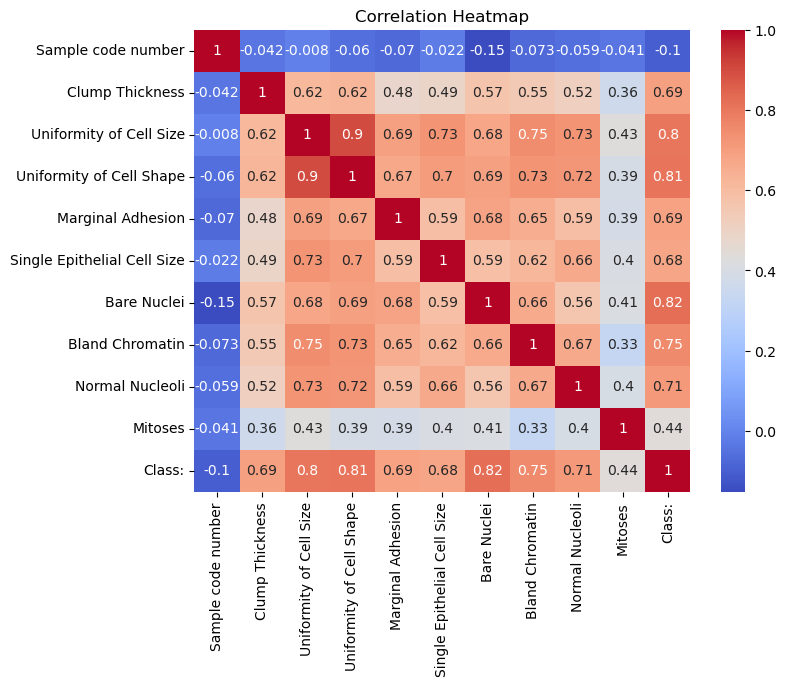

In [15]:

import matplotlib.pyplot as plt
import seaborn as sns
# Compute correlations between features and target
correlations = df.corr()['Class:'].drop('Class:')

# Print correlations
print("Correlation with the Target:")
print(correlations)
print()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## DataTransformation

In [31]:
x=df.drop(['Class:'],axis=1)
y=df['Class:']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [35]:
scaler=StandardScaler();
x_train=scaler.fit_transform(x_train);
x_test=scaler.transform(x_test)

## Logistic Regressionm

In [36]:
regressor=LogisticRegression()

In [37]:
regressor.fit(x_train,y_train)

LogisticRegression()

In [38]:
y_pread=regressor.predict(x_test)

In [39]:
print(classification_report(y_test,y_pread))

              precision    recall  f1-score   support

           2       0.94      1.00      0.97       135
           4       1.00      0.85      0.92        59

    accuracy                           0.95       194
   macro avg       0.97      0.92      0.94       194
weighted avg       0.96      0.95      0.95       194



## Naive

In [40]:
n_model=GaussianNB();


In [41]:
n_model.fit(x_train,y_train);
y_pred=n_model.predict(x_test)

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.99      0.98      0.99       135
           4       0.95      0.98      0.97        59

    accuracy                           0.98       194
   macro avg       0.97      0.98      0.98       194
weighted avg       0.98      0.98      0.98       194



In [43]:
print(confusion_matrix(y_test,y_pread))

[[135   0]
 [  9  50]]


In [16]:
# # print(confusion_matrix(y_test,y_pread))
# tn,fp,fn,tp = confusion_matrix(y_test,y_pread).ravel()

NameError: name 'y_test' is not defined

In [ ]:
# print(tn,fp,fn,tp)

In [ ]:
# a=accuracy_score(y_test,y_pread)
# # accuracy =  (TP + TN) / (TP + TN + FP + FN)
# a

In [ ]:
# e=1-a
# e

In [ ]:
# precision_score(y_test, y_pread)
# # precision = TP / (TP + FP)

In [ ]:
# recall_score(y_test, y_pread)
# # recall = TP / (TP + FN)

In [ ]:
# # f1_Score = 2 * (precision * recall) / (precision + recall)
# f1_score(y_test,y_pread)